In [1]:
!pip install textblob
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv('testData.csv')


df.columns = df.columns.str.strip()


df.dropna(subset=['Review'], inplace=True)

In [3]:
df['Location'].fillna('Unknown', inplace=True)

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
  
    return analysis.sentiment.polarity

In [4]:
df['sentiment_score'] = df['Review'].apply(analyze_sentiment)


positive_reviews = df[df['sentiment_score'] > 0.2]
negative_reviews = df[df['sentiment_score'] < -0.2]


X = df['Review']
y = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
df['sentiment_score'] = df['Review'].apply(analyze_sentiment)


df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative')


df.to_csv('analyzed_reviews.csv', index=False)

print(df[['Review', 'sentiment_score', 'sentiment']].head())

                                              Review  sentiment_score  \
0  I was very impressed with the resort.\n Great ...         0.437037   
1  The rooms were nice the outside needs work als...         0.229167   
2  Great location! I have stayed at this hotel on...         0.293939   
3  The hotel was adequate for my stay. The strips...         0.118333   
4  Great location, room was large and spacious. P...         0.336565   

  sentiment  
0  positive  
1  positive  
2  positive  
3  positive  
4  positive  


In [6]:
df['sentiment_score'] = df['Review'].apply(analyze_sentiment)

# Classify reviews as positive or negative based on sentiment score
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative')


positive_reviews_percentage = (df['sentiment'].value_counts()['positive'] / len(df)) * 100
negative_reviews_percentage = (df['sentiment'].value_counts()['negative'] / len(df)) * 100

print(f'Percentage of positive reviews: {positive_reviews_percentage:.2f}%')
print(f'Percentage of negative reviews: {negative_reviews_percentage:.2f}%')


df.to_csv('analyzed_reviews.csv', index=False)

Percentage of positive reviews: 87.85%
Percentage of negative reviews: 12.15%


In [7]:
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative')

positive_reviews_percentage = (df['sentiment'].value_counts()['positive'] / len(df)) * 100
negative_reviews_percentage = (df['sentiment'].value_counts()['negative'] / len(df)) * 100

print(f'Percentage of positive reviews: {positive_reviews_percentage:.2f}%')
print(f'Percentage of negative reviews: {negative_reviews_percentage:.2f}%')


most_repeating_locations = df['Location'].value_counts().head(10)
print("Most repeating locations:")
print(most_repeating_locations)

df.to_csv('analyzed_reviews.csv', index=False)

Percentage of positive reviews: 87.85%
Percentage of negative reviews: 12.15%
Most repeating locations:
Location
Unknown                     4688
United States of America     116
New York                      34
California                    19
San Jose                      19
Canada                        16
Florida                       16
United Kingdom                14
New York, NY                  13
Toronto                       12
Name: count, dtype: int64


In [8]:
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative')

positive_reviews_percentage = (df['sentiment'].value_counts()['positive'] / len(df)) * 100
negative_reviews_percentage = (df['sentiment'].value_counts()['negative'] / len(df)) * 100

print(f'Percentage of positive reviews: {positive_reviews_percentage:.2f}%')
print(f'Percentage of negative reviews: {negative_reviews_percentage:.2f}%')

# Identify the most repeating locations
most_repeating_locations = df['Location'].value_counts().head(10)
print("Most repeating locations:")
print(most_repeating_locations)

# Identify the least occurring location(s)
least_occurred_location = df['Location'].value_counts().tail(1)
print("Least occurring location:")
print(least_occurred_location)


df.to_csv('analyzed_reviews.csv', index=False)

Percentage of positive reviews: 87.85%
Percentage of negative reviews: 12.15%
Most repeating locations:
Location
Unknown                     4688
United States of America     116
New York                      34
California                    19
San Jose                      19
Canada                        16
Florida                       16
United Kingdom                14
New York, NY                  13
Toronto                       12
Name: count, dtype: int64
Least occurring location:
Location
Trinidad and Tobago    1
Name: count, dtype: int64


In [9]:
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative')

# Calculate the percentage of positive and negative reviews
positive_reviews_percentage = (df['sentiment'].value_counts()['positive'] / len(df)) * 100
negative_reviews_percentage = (df['sentiment'].value_counts()['negative'] / len(df)) * 100

print(f'Percentage of positive reviews: {positive_reviews_percentage:.2f}%')
print(f'Percentage of negative reviews: {negative_reviews_percentage:.2f}%')

# Identify the location with the maximum number of positive reviews
positive_reviews = df[df['sentiment'] == 'positive']
location_with_max_positive_reviews = positive_reviews['Location'].value_counts().idxmax()
max_positive_reviews_count = positive_reviews['Location'].value_counts().max()

print(f'Location with maximum positive reviews: {location_with_max_positive_reviews}')
print(f'Number of positive reviews for this location: {max_positive_reviews_count}')


df.to_csv('analyzed_reviews.csv', index=False)

Percentage of positive reviews: 87.85%
Percentage of negative reviews: 12.15%
Location with maximum positive reviews: Unknown
Number of positive reviews for this location: 4112


In [10]:
negative_reviews = df[df['sentiment'] == 'negative']
location_with_max_negative_reviews = negative_reviews['Location'].value_counts().idxmax()
max_negative_reviews_count = negative_reviews['Location'].value_counts().max()

print(f'Location with maximum negative reviews: {location_with_max_negative_reviews}')
print(f'Number of negative reviews for this location: {max_negative_reviews_count}')


df.to_csv('analyzed_reviews.csv', index=False)

Location with maximum negative reviews: Unknown
Number of negative reviews for this location: 576


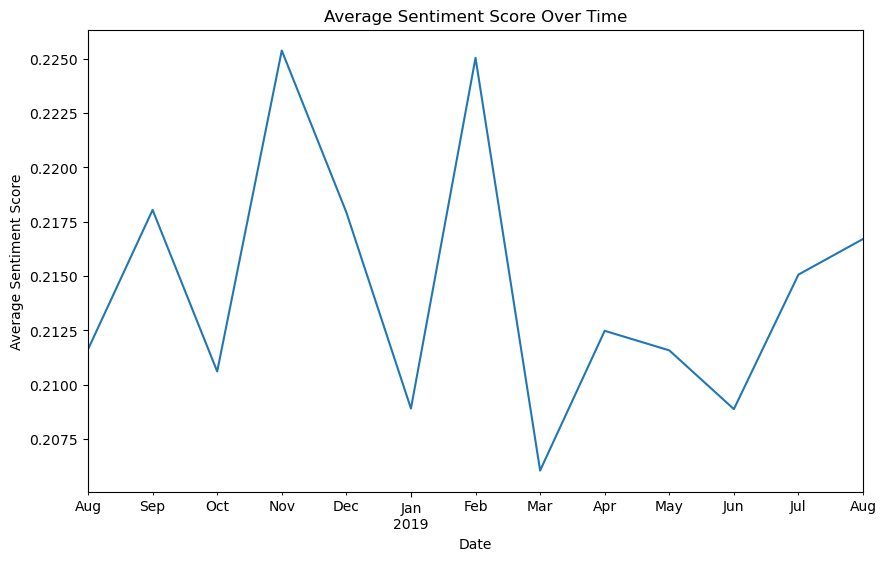

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

# Load your dataset
df = pd.read_csv('testData.csv')

# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Drop rows with null values in the 'Review' column (if any)
df.dropna(subset=['Review'], inplace=True)

# Handle null values in the 'Location' column by filling with a default value
df['Location'].fillna('Unknown', inplace=True)

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Assign sentiment polarity where -1 is very negative and +1 is very positive
    return analysis.sentiment.polarity

# Apply sentiment analysis to each review
df['sentiment_score'] = df['Review'].apply(analyze_sentiment)

# Classify reviews as positive or negative based on sentiment score
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative')

# Function to parse date with different formats
def parse_date(date_str):
    try:
        return parse(date_str)
    except:
        return None

# Convert the 'date' column to datetime format, handling different formats
df['date'] = df['date'].apply(parse_date)

# Group by date and calculate the mean sentiment score
sentiment_over_time = df.groupby(df['date'].dt.to_period('M'))['sentiment_score'].mean()

# Plot the sentiment scores over time
plt.figure(figsize=(10, 6))
sentiment_over_time.plot(kind='line')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.show()


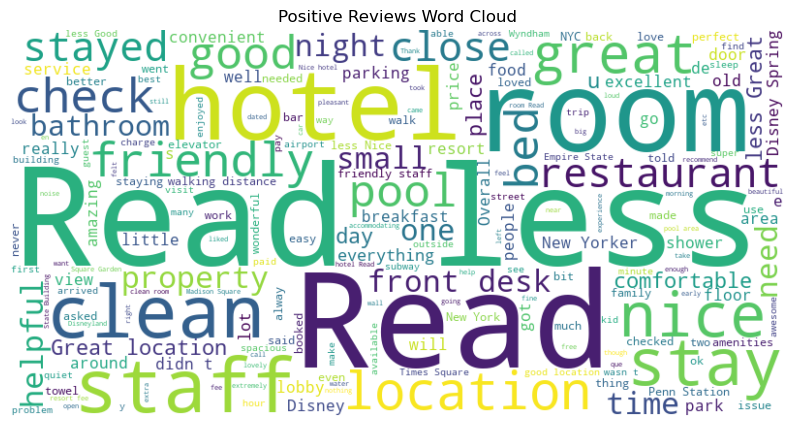

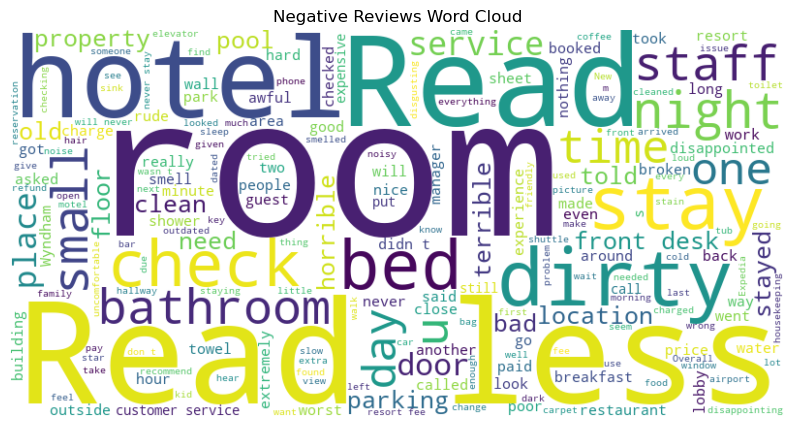

In [20]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative reviews
positive_reviews_text = ' '.join(positive_reviews['Review'])
negative_reviews_text = ' '.join(negative_reviews['Review'])

# Generate and display the positive word cloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

# Generate and display the negative word cloud
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_text)
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()
